In [1]:
import pandas as pd
import numpy as np

from cleaningScript import cleanData # 1 <3 encapsulation

#Seans imported Modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing
#matplotlib for visualization
import matplotlib.pyplot as plt
#sns for visualization
import seaborn as sns

from math import sqrt

#Neural Network
import keras
import tensorflow
import keras as keras
from keras import layers
from keras.layers import Dense, Embedding 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM 
from keras.preprocessing import sequence 
from keras.models import Sequential 

2022-07-04 08:13:23.747170: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-04 08:13:23.747206: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
#route 84, direction 1. This can be altered.
route, direction = '84', 1

In [3]:
df = cleanData(route, direction)

In [4]:
df

,date,tripid,progrnumber,stopActualArr,journeytime,dwelltime,rain,temp,humidity,pressure
0,2018-01-01,5955785,1,36583,0,0,0.0,5.6,79,992.9
1,2018-01-01,5955785,2,36617,34,12,0.0,5.6,79,992.9
2,2018-01-01,5955785,3,36721,138,0,0.0,5.6,79,992.9
3,2018-01-01,5955785,4,36782,199,8,0.0,5.6,79,992.9
4,2018-01-01,5955785,5,36819,236,0,0.0,5.6,79,992.9
...,...,...,...,...,...,...,...,...,...,...
366351,2018-10-27,8048174,83,83849,4681,0,0.0,2.6,78,1026.1
366352,2018-10-27,8048174,84,83897,4729,0,0.0,2.6,78,1026.1
366353,2018-10-27,8048174,85,83944,4776,0,0.0,2.6,78,1026.1
366354,2018-10-27,8048174,86,83955,4787,0,0.0,2.6,78,1026.1


In [5]:
#Check The Data Types
df.dtypes

date             datetime64[ns]
tripid                    int64
progrnumber               int64
stopActualArr             int64
journeytime               Int64
dwelltime                 int64
rain                    float64
temp                    float64
humidity                  int64
pressure                float64
dtype: object

In [6]:
#Check for null values
df.isna().sum()

date             0
tripid           0
progrnumber      0
stopActualArr    0
journeytime      0
dwelltime        0
rain             0
temp             0
humidity         0
pressure         0
dtype: int64

# Values Explination 

*Date:* The date which the trip occured on.

*tripid:* The ID of that specific trip. Remember this is an individual bus route.

*stopActualArr:* The actual time of arrival in seconds

*Journey Time:* The time the total journey has taken thus far in seconds

*Dwell time:* The amount of time a bus waits at a given stop

*Weather is self explanitory*


# Further Review of Trip ID

In [7]:
test_tripID = df.loc[df['tripid'] == 5955785]

In [8]:
test_tripID.head(50)

,date,tripid,progrnumber,stopActualArr,journeytime,dwelltime,rain,temp,humidity,pressure
0,2018-01-01,5955785,1,36583,0,0,0.0,5.6,79,992.9
1,2018-01-01,5955785,2,36617,34,12,0.0,5.6,79,992.9
2,2018-01-01,5955785,3,36721,138,0,0.0,5.6,79,992.9
3,2018-01-01,5955785,4,36782,199,8,0.0,5.6,79,992.9
4,2018-01-01,5955785,5,36819,236,0,0.0,5.6,79,992.9
5,2018-01-01,5955785,6,36867,284,0,0.0,5.6,79,992.9
6,2018-01-01,5955785,7,36905,322,0,0.0,5.6,79,992.9
7,2018-01-01,5955785,8,36915,332,0,0.0,5.6,79,992.9
8,2018-01-01,5955785,9,36936,353,0,0.0,5.6,79,992.9
9,2018-01-01,5955785,10,36996,413,0,0.0,5.6,79,992.9


In [9]:
test_tripID.head(100)

,date,tripid,progrnumber,stopActualArr,journeytime,dwelltime,rain,temp,humidity,pressure
0,2018-01-01,5955785,1,36583,0,0,0.0,5.6,79,992.9
1,2018-01-01,5955785,2,36617,34,12,0.0,5.6,79,992.9
2,2018-01-01,5955785,3,36721,138,0,0.0,5.6,79,992.9
3,2018-01-01,5955785,4,36782,199,8,0.0,5.6,79,992.9
4,2018-01-01,5955785,5,36819,236,0,0.0,5.6,79,992.9
...,...,...,...,...,...,...,...,...,...,...
81,2018-01-01,5955785,82,41168,4585,0,0.0,6.7,77,994.1
82,2018-01-01,5955785,83,41217,4634,0,0.0,6.7,77,994.1
83,2018-01-01,5955785,84,41268,4685,0,0.0,6.7,77,994.1
84,2018-01-01,5955785,85,41283,4700,11,0.0,6.7,77,994.1


In [10]:
test_tripID_two = df.loc[df['tripid'] == 8048174]

In [11]:
test_tripID_two.head(50)

,date,tripid,progrnumber,stopActualArr,journeytime,dwelltime,rain,temp,humidity,pressure
366270,2018-10-27,8048174,1,79168,0,0,0.0,1.9,70,1026.2
366271,2018-10-27,8048174,3,79306,138,0,0.0,1.8,74,1026.3
366272,2018-10-27,8048174,4,79347,179,0,0.0,1.8,74,1026.3
366273,2018-10-27,8048174,5,79371,203,0,0.0,1.8,74,1026.3
366274,2018-10-27,8048174,6,79413,245,23,0.0,1.8,74,1026.3
366275,2018-10-27,8048174,7,79486,318,11,0.0,1.8,74,1026.3
366276,2018-10-27,8048174,8,79516,348,0,0.0,1.8,74,1026.3
366277,2018-10-27,8048174,9,79537,369,0,0.0,1.8,74,1026.3
366278,2018-10-27,8048174,10,79585,417,0,0.0,1.8,74,1026.3
366279,2018-10-27,8048174,11,79615,447,0,0.0,1.8,74,1026.3


In [12]:
test_tripID_two.head(86)

,date,tripid,progrnumber,stopActualArr,journeytime,dwelltime,rain,temp,humidity,pressure
366270,2018-10-27,8048174,1,79168,0,0,0.0,1.9,70,1026.2
366271,2018-10-27,8048174,3,79306,138,0,0.0,1.8,74,1026.3
366272,2018-10-27,8048174,4,79347,179,0,0.0,1.8,74,1026.3
366273,2018-10-27,8048174,5,79371,203,0,0.0,1.8,74,1026.3
366274,2018-10-27,8048174,6,79413,245,23,0.0,1.8,74,1026.3
...,...,...,...,...,...,...,...,...,...,...
366351,2018-10-27,8048174,83,83849,4681,0,0.0,2.6,78,1026.1
366352,2018-10-27,8048174,84,83897,4729,0,0.0,2.6,78,1026.1
366353,2018-10-27,8048174,85,83944,4776,0,0.0,2.6,78,1026.1
366354,2018-10-27,8048174,86,83955,4787,0,0.0,2.6,78,1026.1


**Trip ID analysis**

Id simply identifies the trip, and is used to represent an individual bus along a given route until that route has been completed.

# Creation of Day, Month, Hour Columns.

**These will most likely result in the most impactful analysis**

In [13]:
#create day column
df['day'] = pd.to_datetime(df['date'], format='%H:%M:%S').dt.dayofweek

In [14]:
#create month column
df['month'] = pd.to_datetime(df['date'], format='%H:%M:%S').dt.month

In [15]:
df.head()

,date,tripid,progrnumber,stopActualArr,journeytime,dwelltime,rain,temp,humidity,pressure,day,month
0,2018-01-01,5955785,1,36583,0,0,0.0,5.6,79,992.9,0,1
1,2018-01-01,5955785,2,36617,34,12,0.0,5.6,79,992.9,0,1
2,2018-01-01,5955785,3,36721,138,0,0.0,5.6,79,992.9,0,1
3,2018-01-01,5955785,4,36782,199,8,0.0,5.6,79,992.9,0,1
4,2018-01-01,5955785,5,36819,236,0,0.0,5.6,79,992.9,0,1


# Remove Negative Values

In [16]:
df = df[df['stopActualArr'] >= 0]
df = df[df['journeytime'] >= 0]

# Remove all values but the last occurance

In [17]:
last_stop = df.drop_duplicates(subset=['tripid'], keep='last')

In [18]:
last_stop.head()

,date,tripid,progrnumber,stopActualArr,journeytime,dwelltime,rain,temp,humidity,pressure,day,month
85,2018-01-01,5955785,86,41351,4768,0,0.0,6.7,77,994.1,0,1
171,2018-01-01,5967786,86,45648,4228,0,0.0,7.5,73,994.8,0,1
255,2018-01-01,5955787,89,51000,4788,0,0.1,6.4,81,998.3,0,1
341,2018-01-01,5967788,86,55517,4583,0,0.0,7.3,75,1000.1,0,1
427,2018-01-01,5955789,86,60201,4337,0,0.0,6.7,74,1001.9,0,1


# Visual Correlation Analysis

**By using the normal DF it is easier to visualize the data, despite this strictly being not best practise it's ok**.

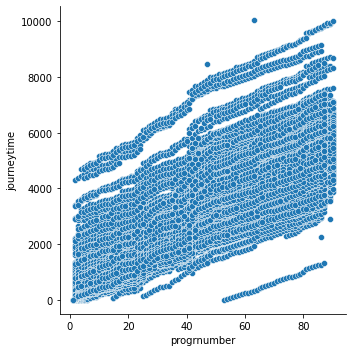

In [19]:
#utilizes DF
f = sns.relplot(x='progrnumber', y='journeytime', data=df)
f.fig.set_size_inches(5,5)

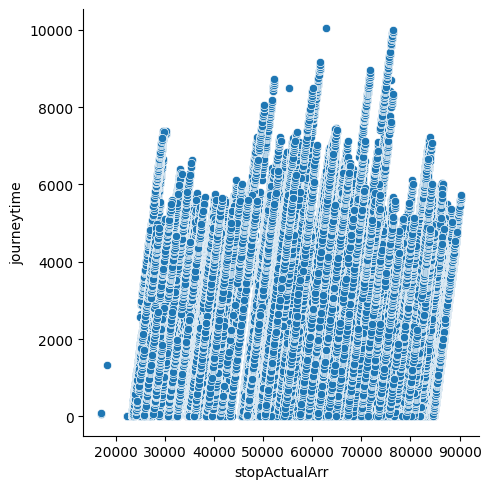

In [20]:
#utilizes DF
f = sns.relplot(x='stopActualArr', y='journeytime', data=df)
f.fig.set_size_inches(5,5)

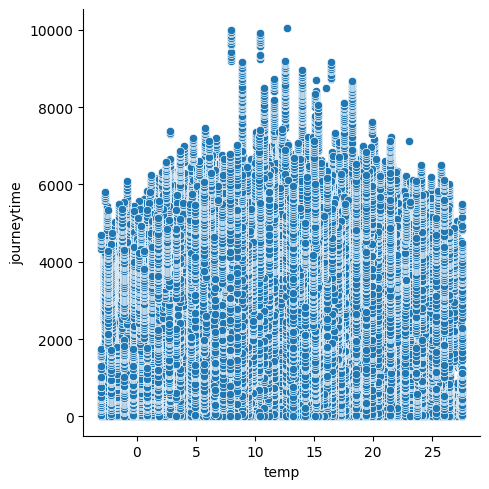

In [21]:
#utilizes DF
f = sns.relplot(x='temp', y='journeytime', data=df)
f.fig.set_size_inches(5,5)

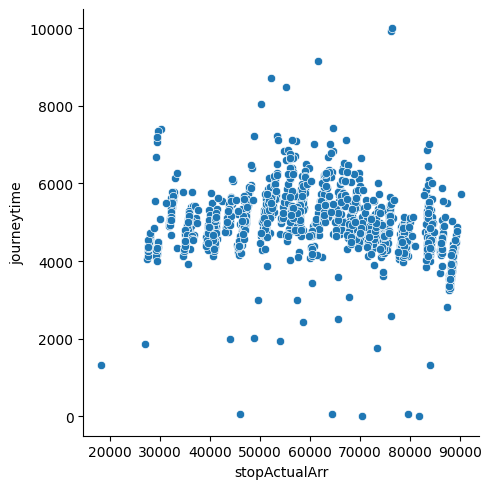

In [22]:
#utilizes last_stop data
#The time of Day it reaches the last stop
f = sns.relplot(x='stopActualArr', y='journeytime', data=last_stop)
f.fig.set_size_inches(5,5)

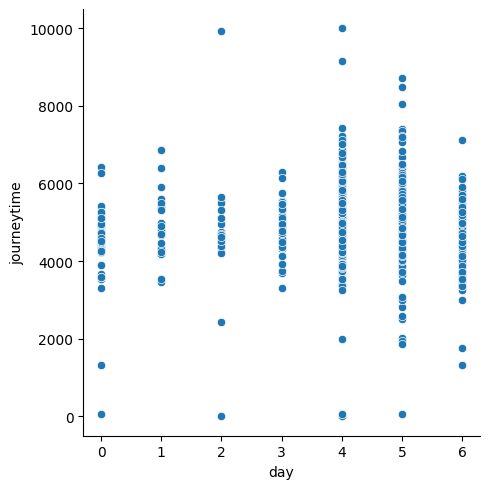

In [23]:
#utilizes last_stop
#monday is 0 sunday is 6
f = sns.relplot(x='day', y='journeytime', data=last_stop)
f.fig.set_size_inches(5,5)

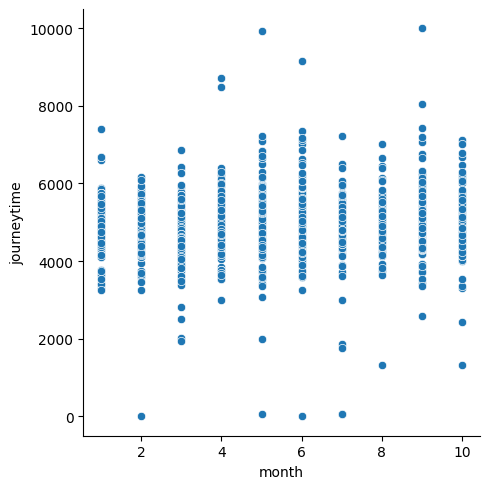

In [24]:
f = sns.relplot(x='month', y='journeytime', data=last_stop)
f.fig.set_size_inches(5,5)

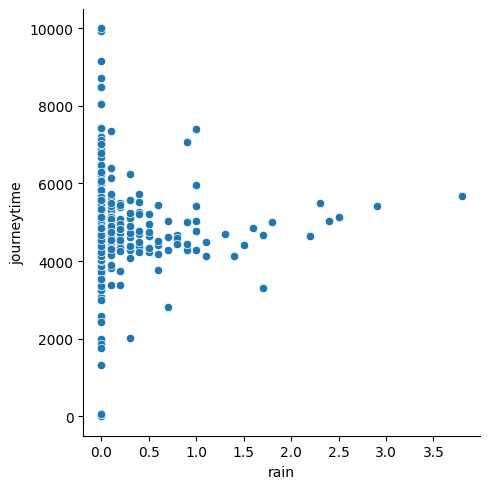

In [25]:
#utilizes last_stop
#january is 0 
f = sns.relplot(x='rain', y='journeytime', data=last_stop)
f.fig.set_size_inches(5,5)

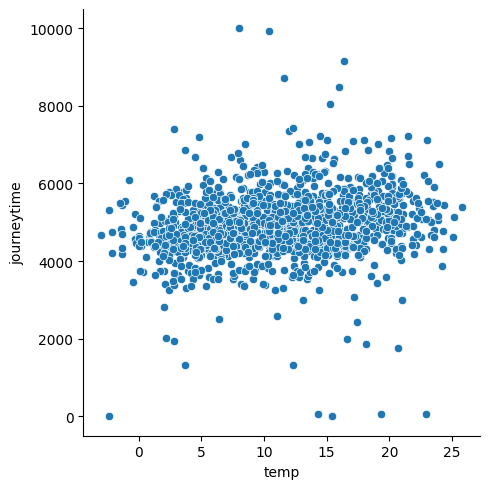

In [26]:
#utilizes last_stop
#january is 0 
f = sns.relplot(x='temp', y='journeytime', data=last_stop)
f.fig.set_size_inches(5,5)

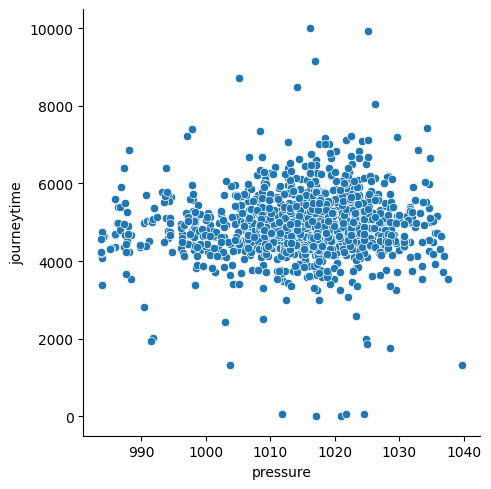

In [27]:
#utilizes last_stop
#january is 0 
f = sns.relplot(x='pressure', y='journeytime', data=last_stop)
f.fig.set_size_inches(5,5)

# Data Cleaning and Analysis Notes: 

**Progrmnumber & Journey Time:** This displays a near linear relationship with the bus route. This is a promising metric to use for machine learning.

It has an issue however that it suffers from negative values which are impossible. These are either to be rectified or changed. I believe these values have occured due to happening at later than midnight. (nightbus ?)

**Journey time & stop Acc Arrival:** This displays a slight relationship. The X axis displaying the Arrival Time and the Y displaying the journey time. it can be seen that there is an increase in overall journey time roughly between 4000 and 60000l. 

**Temperature & Journey Time:** There is a relationship which has been displayed here, however it will need further analysis. Potentially the longer travel times during the temerpature ranges of 5-17 is due to the temperature being very low during the late night and early morning hours (where travel times would be faster).

**Weather** Weather displayed no particular relationship with the individual stop times.

**Last Stop Analysis** The last stop analysis was to gain an understanding on whether weather had an effect on the overall journey time. It can be seen that there is no strong aparent relationship between any weather variable and the target feature of journey time.

**Potential Approach to Prediction:** Dwell Time does not seem to be manageable, and the ability to predict differing stops exceeds our ability. I believe it is best for the Pickle file to return a complete trip time, divide by number of stops create an average for each stop then 


# Models Pre-Explination

These models are able tp predict the JOURNEY TIME at a given stop. Therefore if we knew when a bus was leaving, we could predict the time it takes to reach a given stop through this model.

## Drop Date, TripID from Last Stop and DF

In [28]:
df = df.drop(columns=['date', 'tripid', 'stopActualArr'])

In [29]:
#Last stop will also drop the progrnumber due to it being accepted this is the final stop
last_stop = last_stop.drop(columns=['date', 'tripid', 'progrnumber'])

## Create DF X, Y Train and X, Y Split

In [30]:
#y contains the target feature and x contains everything but the target feature. Which in this case is price
y = pd.DataFrame(df["journeytime"])
X = df.drop(["journeytime"],1)

/tmp/ipykernel_145793/3245475026.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop(["journeytime"],1)


In [31]:
# Here we are splitting the it into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

print("Start Dataframe Shape: ",df.shape[0])
print("training range (70%):\t rows 0 to", round(X_train.shape[0]))
print("test range (30%): \t rows", round(X_train.shape[0]), "to", round(X_train.shape[0]) + X_test.shape[0])

Start Dataframe Shape:  366197
training range (70%):	 rows 0 to 256337
test range (30%): 	 rows 256337 to 366197


In [32]:
X_train.head()

,progrnumber,dwelltime,rain,temp,humidity,pressure,day,month
329023,78,0,0.0,9.6,86,1017.3,5,9
116600,84,0,0.3,4.2,83,1001.7,2,4
87888,71,0,0.0,4.4,87,1003.8,0,3
161701,70,0,0.0,10.3,73,1005.0,4,5
258593,37,12,0.6,15.4,90,995.5,6,7


## Linear Regression

In [33]:
# Train aka fit, a model using all continuous and categorical features.
#
multiple_linreg = LinearRegression(fit_intercept=True,
    normalize=True,
    copy_X=False,
    n_jobs=True,
    positive=False,).fit(X_train, y_train)

/home/student/miniconda3/envs/dublinbusenv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


### Coefficients and Weights of each column

In [34]:
# Print the weights learned for each feature.
print("\nFeatures are: \n", X_train.columns)
print("\nCoeficients are: \n", multiple_linreg.coef_)
print("\nIntercept is: \n", multiple_linreg.intercept_)


Features are: 
 Index(['progrnumber', 'dwelltime', 'rain', 'temp', 'humidity', 'pressure',
       'day', 'month'],
      dtype='object')

Coeficients are: 
 [[ 59.25369519   0.18062979  77.68136229   0.98442774  -7.49562577
   -1.30519467 -17.6974789   -4.80079916]]

Intercept is: 
 [2051.85399462]


### Print the Predicted Target Feature Values

In [35]:
# calculate the prediction and threshold the value.
multiple_linreg_predictions_train = (multiple_linreg.predict(X_train))
print("\nPredictions with multiple linear regression: \n")
actual_vs_predicted_multiplelinreg = pd.concat([y_train.reset_index(drop=True), pd.DataFrame(multiple_linreg_predictions_train, columns=['Predicted'])], axis=1)
print(actual_vs_predicted_multiplelinreg.head(10))


Predictions with multiple linear regression: 

   journeytime    Predicted
0         4102  4578.999788
1         4993  5072.454805
2         2816  4286.521589
3         4003  4256.057031
4         3331  2194.459201
5         4585  4753.346959
6         4553  4611.471639
7         3277  3779.121911
8         2982  4478.815129
9         2011  1811.572427


In [36]:
print("\n==================== Train Data ======================")
print("R2 Score: ", r2_score(y_train, multiple_linreg_predictions_train))
print("Mean Squared Error: \n", mean_squared_error(y_train, multiple_linreg_predictions_train, squared=False))
print("\nMean Absolute Error:\n ",mean_absolute_error(y_train, multiple_linreg_predictions_train))
print("\nRoot Mean Squred Error:\n ",sqrt(mean_absolute_error(y_train, multiple_linreg_predictions_train)))


==================== Train Data ======================
R2 Score:  0.8824637984237854
Mean Squared Error: 
 543.2132838262039

Mean Absolute Error:
  385.9311264990363

Root Mean Squred Error:
  19.645129841745415


### Perform testing on the test set.

In [37]:
#Give this an easier name
l_reg_test_set = multiple_linreg.predict(X_test)

In [38]:
# Some evaluation metrics.
print("==================== Test Data =======================")
print("R2 Score: ", r2_score(y_test, l_reg_test_set))
print("Mean Squared Error: \n",  mean_squared_error(y_test, l_reg_test_set, squared=False))
print("Mean Absolute Error:\n ", mean_absolute_error(y_test, l_reg_test_set))
print("\nRoot Mean Squred Error:\n ", sqrt(mean_absolute_error(y_test,  l_reg_test_set)))
print("\n==================== Train Data ======================")
print("R2 Score: ", r2_score(y_train, multiple_linreg_predictions_train))
print("Mean Squared Error: \n", mean_squared_error(y_train, multiple_linreg_predictions_train, squared=False))
print("\nMean Absolute Error:\n ",mean_absolute_error(y_train, multiple_linreg_predictions_train))
print("\nRoot Mean Squred Error:\n ",sqrt(mean_absolute_error(y_train, multiple_linreg_predictions_train)))

==================== Test Data =======================
R2 Score:  0.8855756215294717
Mean Squared Error: 
 534.9952107132776
Mean Absolute Error:
  380.6432824635209

Root Mean Squred Error:
  19.510081559632724

==================== Train Data ======================
R2 Score:  0.8824637984237854
Mean Squared Error: 
 543.2132838262039

Mean Absolute Error:
  385.9311264990363

Root Mean Squred Error:
  19.645129841745415


### Linear Regression Analysis

# Decision Tree

In [39]:
#train the decision tree

decisionT4 = DecisionTreeRegressor(max_depth=4, random_state=1)
decisionT10 = DecisionTreeRegressor(max_depth=20, random_state=1)
decisionT4.fit(X_train, y_train)
decisionT10.fit(X_train, y_train)
print("Max depth 4: \n",decisionT4)
print("Max depth 20: \n",decisionT10)

Max depth 4: 
 DecisionTreeRegressor(max_depth=4, random_state=1)
Max depth 20: 
 DecisionTreeRegressor(max_depth=20, random_state=1)


### Print the Predicted Target Feature Values

In [40]:
# calculate the prediction and threshold the value.
decision_tree_train = decisionT4.predict(X_train, check_input=True)
print("\nPredictions with Decision tree: \n")
actual_vs_predicted_decisiontree = pd.concat([y_train.reset_index(drop=True), pd.DataFrame(decision_tree_train, columns=['Predicted'])], axis=1)
print(actual_vs_predicted_decisiontree.head(10))


Predictions with Decision tree: 

   journeytime    Predicted
0         4102  4163.971755
1         4993  4726.743908
2         2816  4163.971755
3         4003  4163.971755
4         3331  2381.705355
5         4585  4726.743908
6         4553  4726.743908
7         3277  3759.265571
8         2982  4163.971755
9         2011  1845.340506


In [41]:
decision_train = decisionT4.predict(X_train)
decision_test = decisionT4.predict(X_test)

In [42]:
print("\n==================== Train Data ======================")
print("R2 Score: ", r2_score(y_train, decision_train))
print("Mean Squared Error: \n", mean_squared_error(y_train, decision_train, squared=False))
print("\nMean Absolute Error:\n ",mean_absolute_error(y_train, decision_train))
print("\nRoot Mean Squred Error:\n ",sqrt(mean_absolute_error(y_train, decision_train)))


==================== Train Data ======================
R2 Score:  0.8853028830655744
Mean Squared Error: 
 536.6125267754013

Mean Absolute Error:
  377.46163544568753

Root Mean Squred Error:
  19.42837191958419


### Perform testing on the test set.

In [43]:
# Some evaluation metrics.
print("==================== Test Data =======================")
print("R2 Score: ", r2_score(y_test, decision_test))
print("Mean Squared Error: \n",  mean_squared_error(y_test, decision_test, squared=False))
print("Mean Absolute Error:\n ", mean_absolute_error(y_test, decision_test))
print("\nRoot Mean Squred Error:\n ", sqrt(mean_absolute_error(y_test,  decision_test)))
print("\n==================== Train Data ======================")
print("R2 Score: ", r2_score(y_train, decision_train))
print("Mean Squared Error: \n", mean_squared_error(y_train, decision_train, squared=False))
print("\nMean Absolute Error:\n ",mean_absolute_error(y_train, decision_train))
print("\nRoot Mean Squred Error:\n ",sqrt(mean_absolute_error(y_train, decision_train)))

==================== Test Data =======================
R2 Score:  0.8889741279828863
Mean Squared Error: 
 526.9904069429158
Mean Absolute Error:
  370.91082475335855

Root Mean Squred Error:
  19.259045271076097

==================== Train Data ======================
R2 Score:  0.8853028830655744
Mean Squared Error: 
 536.6125267754013

Mean Absolute Error:
  377.46163544568753

Root Mean Squred Error:
  19.42837191958419


### Decision Tree Analysis

# Random Forrest

In [44]:
# Train RF with 100 trees
randomF = RandomForestRegressor(n_estimators=100, max_features='auto', oob_score=True, random_state=1)
randomF.fit(X_train, y_train)

/tmp/ipykernel_145793/1327641773.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomF.fit(X_train, y_train)
/home/student/miniconda3/envs/dublinbusenv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_features='auto', oob_score=True, random_state=1)

### Review importance of each value

In [45]:
Valueimportance = pd.DataFrame({'feature': X_train.columns, 'importance':randomF.feature_importances_})
Valueimportance.sort_values('importance', ascending=False)

,feature,importance
0,progrnumber,0.892781
5,pressure,0.028393
3,temp,0.025938
4,humidity,0.022298
6,day,0.010968
7,month,0.008811
1,dwelltime,0.007717
2,rain,0.003095


**Analysis of Each Value**

### Print Target Feature Predicted Values

In [46]:
# calculate the prediction and threshold the value.
random_forrest_train_predict = randomF.predict(X_train)
print("\nPredictions with Random Forrest: \n")
actual_vs_predicted_random_forrest = pd.concat([y_train.reset_index(drop=True), pd.DataFrame(random_forrest_train_predict, columns=['Predicted'])], axis=1)
print(actual_vs_predicted_random_forrest.head(10))


Predictions with Random Forrest: 

   journeytime    Predicted
0         4102  4059.910000
1         4993  4991.910000
2         2816  2888.860000
3         4003  3994.280000
4         3331  3228.590000
5         4585  4692.920000
6         4553  4488.340000
7         3277  3420.790000
8         2982  3069.113333
9         2011  2028.480000


In [47]:
#Give these easier names
rForrestTrain = randomF.predict(X_train)
rForrestTest = randomF.predict(X_test)

In [48]:
print("\n==================== Train Data ======================")
print("R2 Score: ", r2_score(y_train, rForrestTrain))
print("Mean Squared Error: \n", mean_squared_error(y_train, rForrestTrain, squared=False))
print("\nMean Absolute Error:\n ",mean_absolute_error(y_train, rForrestTrain))
print("\nRoot Mean Squred Error:\n ",sqrt(mean_absolute_error(y_train, rForrestTrain)))


==================== Train Data ======================
R2 Score:  0.991637125370786
Mean Squared Error: 
 144.8979859958859

Mean Absolute Error:
  86.41528192450633

Root Mean Squred Error:
  9.29598203120608


## Perform testing on test set

In [49]:
# Some evaluation metrics.
print("==================== Test Data =======================")
print("R2 Score: ", r2_score(y_test, rForrestTest))
print("Mean Squared Error: \n",  mean_squared_error(y_test, rForrestTest, squared=False))
print("Mean Absolute Error:\n ", mean_absolute_error(y_test, rForrestTest))
print("\nRoot Mean Squred Error:\n ", sqrt(mean_absolute_error(y_test,  rForrestTest)))
print("\n==================== Train Data ======================")
print("R2 Score: ", r2_score(y_train, rForrestTrain))
print("Mean Squared Error: \n", mean_squared_error(y_train, rForrestTrain, squared=False))
print("\nMean Absolute Error:\n ",mean_absolute_error(y_train, rForrestTrain))
print("\nRoot Mean Squred Error:\n ",sqrt(mean_absolute_error(y_train, rForrestTrain)))

==================== Test Data =======================
R2 Score:  0.9541378465975411
Mean Squared Error: 
 338.70205722951636
Mean Absolute Error:
  213.96863197003785

Root Mean Squred Error:
  14.627666661844529

==================== Train Data ======================
R2 Score:  0.991637125370786
Mean Squared Error: 
 144.8979859958859

Mean Absolute Error:
  86.41528192450633

Root Mean Squred Error:
  9.29598203120608


## Analysis of Decision Tree

# Neural Network

Section Inspired By: https://www.freecodecamp.org/news/how-to-build-your-first-neural-network-to-predict-house-prices-with-keras-f8db83049159/

And by: 

https://www.tutorialspoint.com/keras/keras_time_series_prediction_using_lstm_rnn.htm

In [119]:
x = df.drop(columns=['journeytime'])
y = df['journeytime'].astype(float)

In [120]:
x.head()

,progrnumber,stopActualArr,dwelltime,rain,temp,humidity,pressure,day,month
0,1,36583,0,0.0,5.6,79,992.9,0,1
1,2,36617,12,0.0,5.6,79,992.9,0,1
2,3,36721,0,0.0,5.6,79,992.9,0,1
3,4,36782,8,0.0,5.6,79,992.9,0,1
4,5,36819,0,0.0,5.6,79,992.9,0,1


In [121]:
y.head()

0      0.0
1     34.0
2    138.0
3    199.0
4    236.0
Name: journeytime, dtype: float64

**Is null**

In [122]:
y.isnull().any() 

False

In [123]:
x.isnull().any() 

progrnumber      False
stopActualArr    False
dwelltime        False
rain             False
temp             False
humidity         False
pressure         False
day              False
month            False
dtype: bool

**is inf**

In [124]:
np.isinf(y).any()

False

In [125]:
np.isinf(x).any()

progrnumber      False
stopActualArr    False
dwelltime        False
rain             False
temp             False
humidity         False
pressure         False
day              False
month            False
dtype: bool

In [126]:
#Change all values to floats
x['progrnumber'] = x['progrnumber'].astype(float)
x['stopActualArr'] = x['stopActualArr'].astype(float)
x['dwelltime'] = x['dwelltime'].astype(float)
x['rain'] = x['rain'].astype(float)
x['temp'] = x['temp'].astype(float)
x['humidity'] = x['humidity'].astype(float)
x['pressure'] = x['pressure'].astype(float)
x['day'] = x['day'].astype(float)
x['month'] = x['month'].astype(float)

In [127]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(x)

In [128]:
y = np.array(y)

In [129]:
y = y.reshape(-1, 1)

In [130]:
y_scale = min_max_scaler.fit_transform(y)

In [131]:
X_scale

array([[0.        , 0.26705243, 0.        , ..., 0.19736842, 0.        ,
        0.        ],
       [0.01123596, 0.26751645, 0.00204151, ..., 0.19736842, 0.        ,
        0.        ],
       [0.02247191, 0.26893578, 0.        , ..., 0.19736842, 0.        ,
        0.        ],
       ...,
       [0.94382022, 0.91340721, 0.        , ..., 0.74342105, 0.83333333,
        1.        ],
       [0.95505618, 0.91355733, 0.        , ..., 0.74342105, 0.83333333,
        1.        ],
       [0.96629213, 0.91447171, 0.        , ..., 0.74342105, 0.83333333,
        1.        ]])

In [132]:
y

array([[   0.],
       [  34.],
       [ 138.],
       ...,
       [4776.],
       [4787.],
       [4854.]])

In [133]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, y, test_size=0.3)

In [134]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [135]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(256337, 9) (54930, 9) (54930, 9) (256337, 1) (54930, 1) (54930, 1)


In [136]:
#https://www.freecodecamp.org/news/how-to-build-your-first-neural-network-to-predict-house-prices-with-keras-f8db83049159/
#https://www.tutorialspoint.com/keras/keras_time_series_prediction_using_lstm_rnn.htm
model = Sequential([
    Dense(32, activation='relu', input_shape=(9,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [137]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [138]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=10,
          validation_data=(X_val, Y_val))

Epoch 1/10
8011/8011 [==============================] - 13s 2ms/step - loss: nan - accuracy: 0.0120 - val_loss: nan - val_accuracy: 0.0106
Epoch 2/10
8011/8011 [==============================] - 12s 2ms/step - loss: nan - accuracy: 0.0120 - val_loss: nan - val_accuracy: 0.0106
Epoch 3/10
8011/8011 [==============================] - 12s 2ms/step - loss: nan - accuracy: 0.0120 - val_loss: nan - val_accuracy: 0.0106
Epoch 4/10
8011/8011 [==============================] - 12s 1ms/step - loss: nan - accuracy: 0.0120 - val_loss: nan - val_accuracy: 0.0106
Epoch 5/10
8011/8011 [==============================] - 12s 1ms/step - loss: nan - accuracy: 0.0120 - val_loss: nan - val_accuracy: 0.0106
Epoch 6/10
8011/8011 [==============================] - 12s 1ms/step - loss: nan - accuracy: 0.0120 - val_loss: nan - val_accuracy: 0.0106
Epoch 7/10
8011/8011 [==============================] - 12s 1ms/step - loss: nan - accuracy: 0.0120 - val_loss: nan - val_accuracy: 0.0106
Epoch 8/10
8011/8011 [=====

# Neural Network 2

Inspired/Informed by:
https://towardsdatascience.com/report-time-execution-prediction-with-keras-and-tensorflow-8c9d9a889237
https://stackoverflow.com/questions/47442792/keras-loss-keeps-increasing
https://stackoverflow.com/questions/49922252/choosing-number-of-steps-per-epoch

In [139]:
df.head()

,progrnumber,stopActualArr,journeytime,dwelltime,rain,temp,humidity,pressure,day,month
0,1,36583,0,0,0.0,5.6,79,992.9,0,1
1,2,36617,34,12,0.0,5.6,79,992.9,0,1
2,3,36721,138,0,0.0,5.6,79,992.9,0,1
3,4,36782,199,8,0.0,5.6,79,992.9,0,1
4,5,36819,236,0,0.0,5.6,79,992.9,0,1


In [140]:
Neural = df

In [141]:
#Change all values to floats
Neural['progrnumber'] = Neural['progrnumber'].astype(float)
Neural['stopActualArr'] = Neural['stopActualArr'].astype(float)
Neural['dwelltime'] = Neural['dwelltime'].astype(float)
Neural['rain'] = Neural['rain'].astype(float)
Neural['temp'] = Neural['temp'].astype(float)
Neural['humidity'] = Neural['humidity'].astype(float)
Neural['pressure'] = Neural['pressure'].astype(float)
Neural['day'] = Neural['day'].astype(float)
Neural['month'] = Neural['month'].astype(float)
Neural['journeytime'] = Neural['journeytime'].astype(float)

In [142]:
Neural.head()

,progrnumber,stopActualArr,journeytime,dwelltime,rain,temp,humidity,pressure,day,month
0,1.0,36583.0,0.0,0.0,0.0,5.6,79.0,992.9,0.0,1.0
1,2.0,36617.0,34.0,12.0,0.0,5.6,79.0,992.9,0.0,1.0
2,3.0,36721.0,138.0,0.0,0.0,5.6,79.0,992.9,0.0,1.0
3,4.0,36782.0,199.0,8.0,0.0,5.6,79.0,992.9,0.0,1.0
4,5.0,36819.0,236.0,0.0,0.0,5.6,79.0,992.9,0.0,1.0


In [143]:
train_dataset = Neural.sample(frac=0.8,random_state=0)
test_dataset = Neural.drop(train_dataset.index)

In [144]:
train_stats = train_dataset.describe()
train_stats.pop("journeytime")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
progrnumber,292958.0,43.840510,25.051296,1.0,22.0,44.0,65.00,90.0
stopActualArr,292958.0,57852.194345,18583.647354,17015.0,42333.0,57827.0,74420.75,90240.0
dwelltime,292958.0,9.038053,40.250507,0.0,0.0,0.0,11.00,5878.0
rain,292958.0,0.051459,0.247695,0.0,0.0,0.0,0.00,8.6
temp,292958.0,11.728091,5.961928,-3.0,7.1,11.9,16.30,27.5
humidity,292958.0,72.225428,14.557816,24.0,62.0,74.0,84.00,98.0
pressure,292958.0,1014.006755,11.252891,980.9,1007.5,1015.6,1022.10,1041.7
day,292958.0,2.661579,1.872433,0.0,1.0,3.0,4.00,6.0
month,292958.0,5.377593,2.827589,1.0,3.0,5.0,8.00,10.0


In [145]:
train_labels = train_dataset.pop('journeytime')
test_labels = test_dataset.pop('journeytime')

In [146]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

In [147]:
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [148]:
def build_model():
  model = keras.Sequential([
    layers.Dense(50, activation='sigmoid', input_shape=[len(train_dataset.keys())]),
    layers.Dense(50, activation='sigmoid'),
    layers.Dense(1)])

  optimizer = keras.optimizers.SGD(0.001)

  model.compile(loss='mean_squared_error',
                    optimizer=optimizer,
                    metrics=['mean_absolute_error', 'mean_squared_error'])

  return model

In [149]:
"""model = build_model()

# The patience parameter is the amount of epochs to check for improvement

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)

history = model.fit(normed_train_data, train_labels, epochs=10,steps_per_epoch=10,
                    validation_split = 0.2, batch_size=50, verbose=0, callbacks=[early_stop])"""

"model = build_model()\n\n# The patience parameter is the amount of epochs to check for improvement\n\nearly_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)\n\nhistory = model.fit(normed_train_data, train_labels, epochs=10,steps_per_epoch=10,\n                    validation_split = 0.2, batch_size=50, verbose=0, callbacks=[early_stop])"

In [150]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)

history = model.fit(normed_train_data, train_labels, epochs=100,
                    validation_split = 0.2, batch_size=50, verbose=0, callbacks=[early_stop])

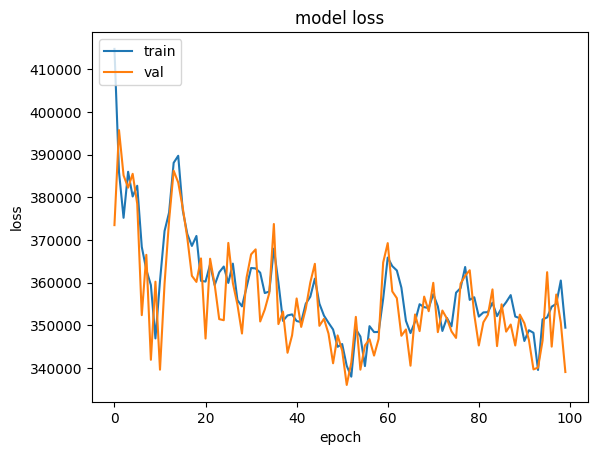

In [151]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [152]:
mse = model.evaluate(normed_test_data, test_labels)
print("Testing set Error Levels:", format(mse))

2289/2289 [==============================] - 3s 1ms/step - loss: 341056.3438 - mean_absolute_error: 437.1953 - mean_squared_error: 341056.3438
Testing set Error Levels: [341056.34375, 437.1953430175781, 341056.34375]


In [153]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)

history = model.fit(normed_train_data, train_labels, epochs=150,
                    validation_split = 0.2, batch_size=50, verbose=0, callbacks=[early_stop])

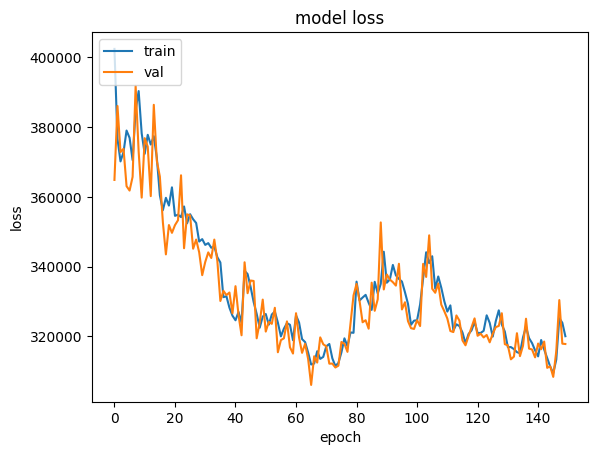

In [154]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [155]:
mse = model.evaluate(normed_test_data, test_labels)
print("Testing set Error Levels:", format(mse))

2289/2289 [==============================] - 3s 1ms/step - loss: 317759.5000 - mean_absolute_error: 414.3144 - mean_squared_error: 317759.5000
Testing set Error Levels: [317759.5, 414.3144226074219, 317759.5]


# Neural Network 3: 

 https://medium.com/geekculture/time-series-forecast-using-deep-learning-adef5753ec85